<a href="https://colab.research.google.com/github/taramatin/obj_detection/blob/main/YOLOv3_Tiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Mount Google Drive On Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Install Dependencies

In [ ]:
!apt-get update
!apt-get upgrade

!apt-get install -y build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-d
!apt-get install -y libopencv-dev

!apt-get install -y g++-5
!apt-get install -y gcc-5

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,614 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ub

Verify CUDA

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvidia-smi

Sat Dec 21 11:00:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Change Directory To Your Directory

In [ ]:
%cd your/directory/path

/content/gdrive/MyDrive/computer_vision/yolov3-tiny


Clone YOLOv3-Tiny Repo In Drive

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
Updating files: 100% (2055/2055), done.


Change Directory To Darknet

In [ ]:
%cd darknet

/content/gdrive/MyDrive/computer_vision/yolov3-tiny/darknet


Listing Directory Contents

In [ ]:
%ls

3rdparty/       DarknetConfig.cmake.in  Dockerfile.cpu         LICENSE        scripts/
build/          darknet_images.py       Dockerfile.gpu         Makefile       src/
build.ps1       darknet.py              image_yolov3.sh        net_cam_v3.sh  vcpkg.json
cfg/            darknet_video.py        image_yolov4.sh        net_cam_v4.sh  video_yolov3.sh
cmake/          data/                   include/               package.xml    video_yolov4.sh
CMakeLists.txt  docker-compose.yml      json_mjpeg_streams.sh  README.md


Change Makefile To Have GPU , OpenCV , cuDNN Enabled

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

Build Darknet

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

Get YOLOv3-Tiny Weights

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2024-12-21 11:04:18--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  29.5MB/s    in 1.1s    

2024-12-21 11:04:20 (29.5 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



Upload Pretrained Convolutional Layer Weights

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2024-12-21 11:04:23--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2024-12-21 11:04:23--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  35.9MB/s    in 4.3s    

2024-12-21 11:04:27 (36.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



Create A Copy Of "yolov3-tiny.cfg" For Custom It.

Then Change Them In Custom File:
*   change line batch to batch=64
*   change line subdivisions to subdivisions=16
*   change line max_batches to classes*2000
*   change line steps to 80% and 90% of max_batches
*   set network size width=416 height=416
*   change [filters=255] to filters=(classes + 5)x3 in the [convolutional] before each [yolo] layer
*   change [filters=57] filters=(classes + 9)x3 in the [convolutional] before each [Gaussian_yolo] layer

In [ ]:
!cp cfg/yolov3-tiny.cfg /content/gdrive/MyDrive/computer_vision/yolov3-tiny/darknet/cfg/yolov3-tiny-custom.cfg

Train!

In [ ]:
!chmod +x ./darknet #for get the permision

In [ ]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 6 -width 416 -height 416   #anchors calculate with our model

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4

 num_of_clusters = 6, width = 416, height = 416 
 read labels from 261 images 
 loaded 	 image: 231 	 Label file name is too short:  
 loaded 	 image: 260 	 box: 260Can't open label file. (This can be normal only if you use MSCOCO):  

 all loaded. 

 calculating k-means++ ...

 iterations = 11 


counters_per_class = 123, 137

 avg IoU = 80.04 % 

Saving anchors to the file: anchors.txt 
anchors =  57,109,  89,179,  71,236, 109,241, 139,270, 232,359


In [ ]:
!./darknet detector train path/to/your/obj.data path/to/your/yolov3-tiny-custom.cfg path/to/your/darknet53.conv.74

Streaming output truncated to the last 5000 lines.
 total_bbox = 248176, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.625860), count: 3, class_loss = 0.983610, iou_loss = 0.442094, total_loss = 1.425705 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.824518), count: 1, class_loss = 0.348979, iou_loss = 0.020790, total_loss = 0.369770 
 total_bbox = 248180, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.666187), count: 2, class_loss = 0.632499, iou_loss = 0.158206, total_loss = 0.790705 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.631357), count: 2, class_loss = 0.732539, iou_loss = 0.337163, total_loss = 1.069702 
 total_bbox = 248184, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.760807), count: 2, class_loss = 0.563349, 

Test

in data/ change the classes in coco.names with your classes

In [ ]:
!./darknet detect path/to/your/yolov3-tiny-custom.cfg path/to/your/backup/yolov3-tiny_final.weights path/to/your/test.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256   

In [ ]:
from IPython.display import Image

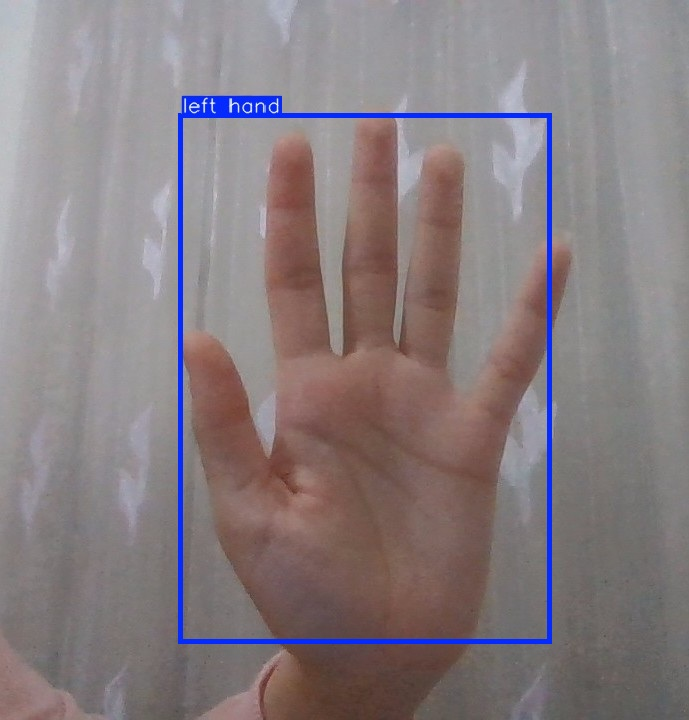

In [ ]:
Image('path/to/your/predictions.jpg')